In [29]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from plotly.matplotlylib.mplexporter.renderers import fig_to_vega

In [30]:
#Loading Dataset
DATASET_PATH = "../Datasets/Covid_Data.csv"
COVID = pd.read_csv(DATASET_PATH)

In [31]:
COVID.shape

(1048575, 21)

In [32]:
COVID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [33]:
COVID.describe(include='all')

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
unique,NaN,NaN,NaN,NaN,401,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,9999-99-99,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,971633,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,NaN,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,...,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,NaN,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,...,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01


In [34]:
#Duplicates
duplicates = COVID.duplicated()
COVID[duplicates]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
19,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
35,2,1,2,1,9999-99-99,97,2,45,97,2,...,2,2,2,2,2,2,2,2,3,97
62,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,7,2
63,2,1,2,1,9999-99-99,97,2,33,97,2,...,2,2,2,2,2,2,2,2,7,97
75,2,1,1,1,9999-99-99,97,2,24,2,2,...,2,2,2,2,2,2,2,2,7,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048556,2,13,2,1,9999-99-99,97,2,31,97,2,...,2,2,2,2,2,2,2,2,7,97
1048558,1,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048566,2,13,2,1,9999-99-99,97,2,24,97,2,...,1,2,2,2,2,2,2,2,7,97
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97


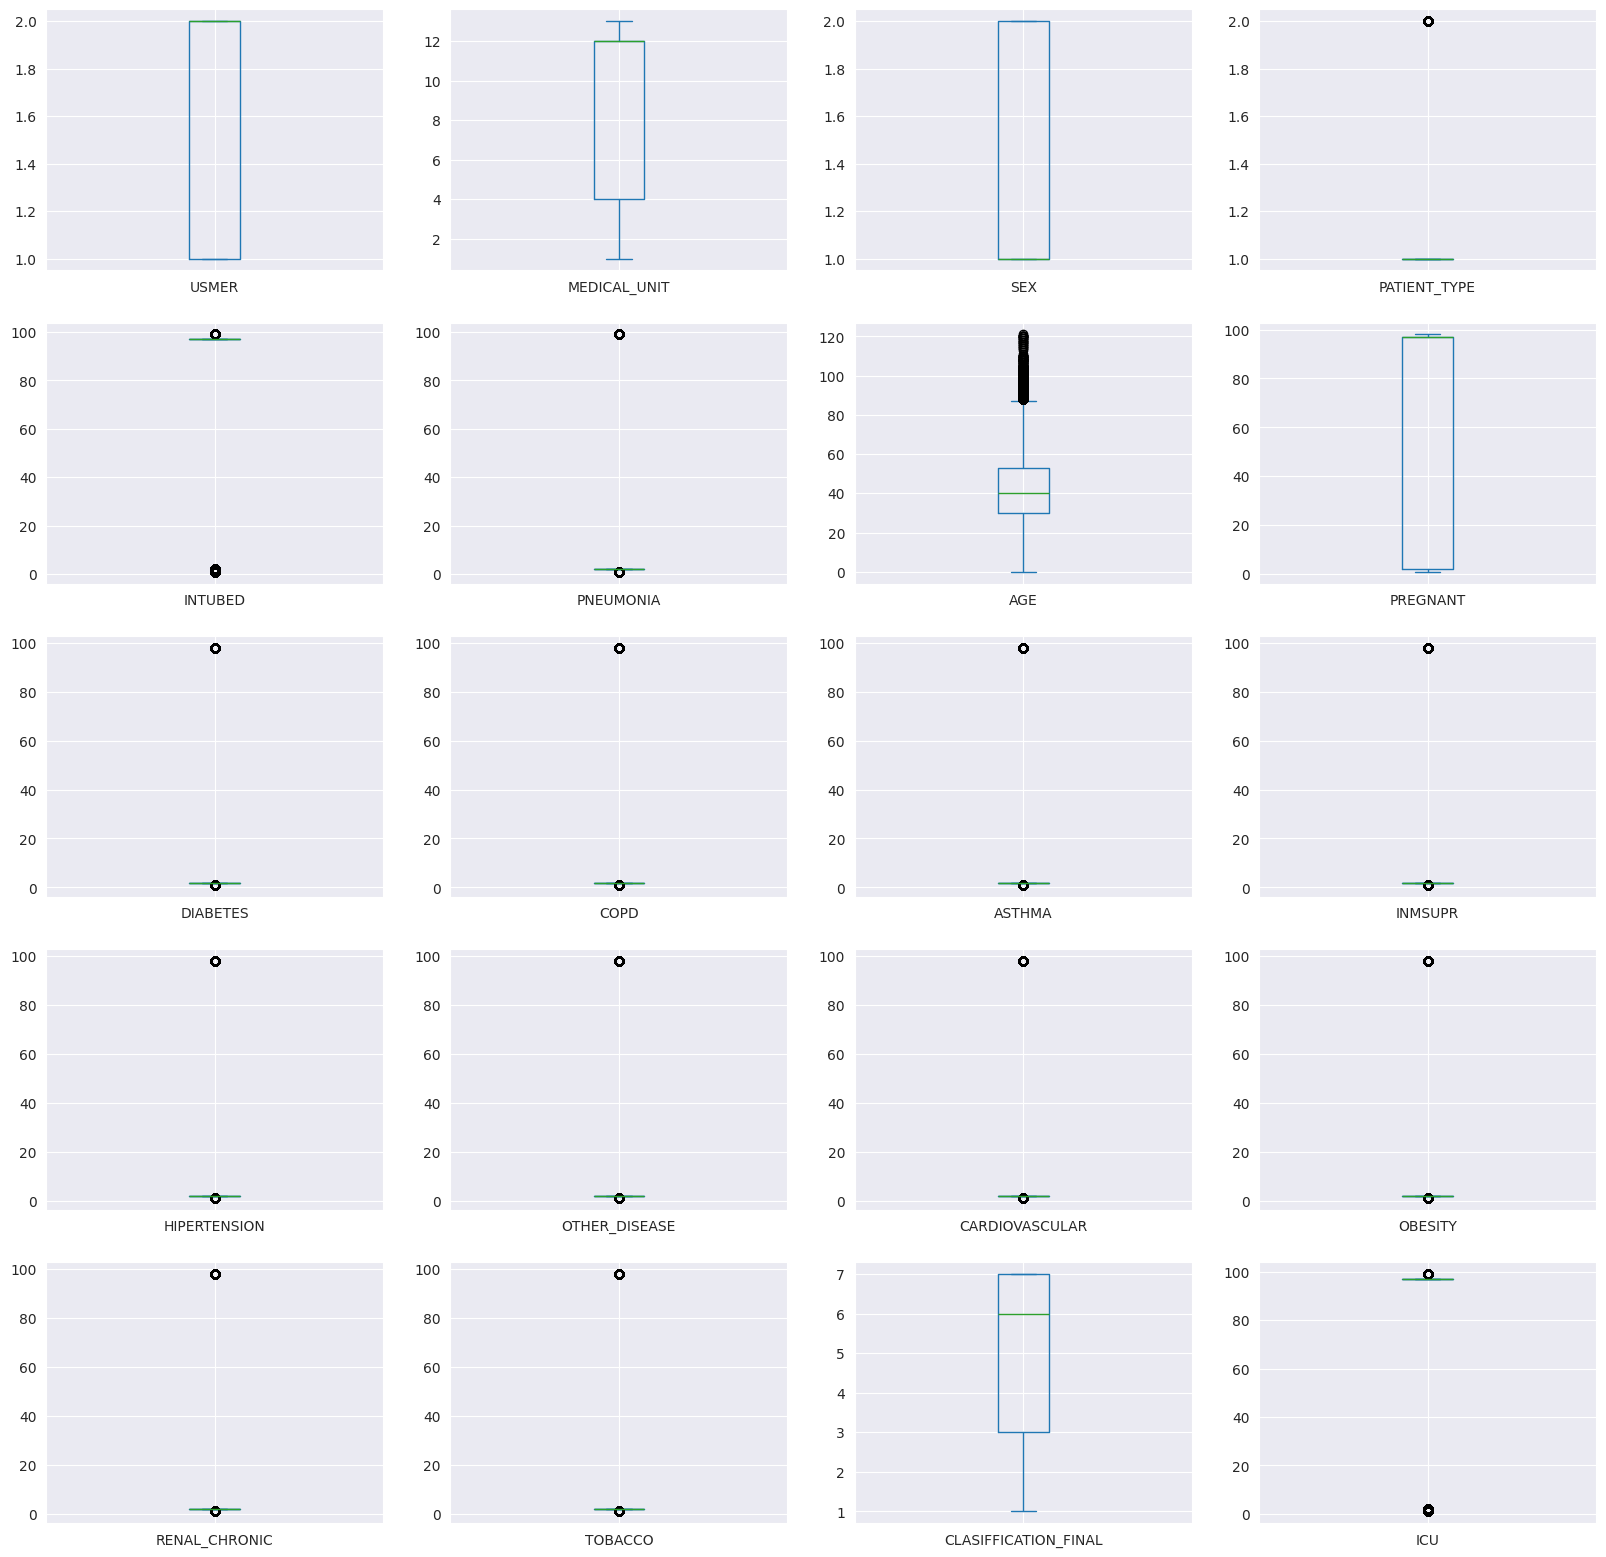

In [35]:
columns = COVID.columns
axes = COVID[columns].plot (
    kind='box',
    subplots=True,
    layout=(10,4),
    figsize=(20,40)
)
plt.show()

In [36]:
print(COVID['INTUBED'].value_counts())
print(COVID['ICU'].value_counts())
print(COVID['PREGNANT'].value_counts())
print(COVID['HIPERTENSION'].value_counts())
print(COVID['CLASIFFICATION_FINAL'].value_counts())

INTUBED
97    848544
2     159050
1      33656
99      7325
Name: count, dtype: int64
ICU
97    848544
2     175685
1      16858
99      7488
Name: count, dtype: int64
PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: count, dtype: int64
HIPERTENSION
2     882742
1     162729
98      3104
Name: count, dtype: int64
CLASIFFICATION_FINAL
7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: count, dtype: int64


In [37]:
# Value 97 = Not specified (it probably means No, need to prove it)
# Value 99,98 = NaN

# Nonsense value Pregnant Men
COVID.loc[(COVID['PREGNANT'] == 97) & (COVID['SEX'] == 2),'PREGNANT'] = 0
# Patient Type 1 are at home, so they can't be in ICU or Intubed
COVID.loc[(COVID['PATIENT_TYPE'] == 1) & (COVID['ICU'] == 97),'ICU'] = 0
COVID.loc[(COVID['PATIENT_TYPE'] == 1) & (COVID['INTUBED'] == 97),'INTUBED'] = 0

# Person died
COVID["DATE_DIED"] = pd.to_datetime(COVID["DATE_DIED"], format="%d/%m/%Y", errors="coerce")
COVID['DIED'] = 1
COVID.loc[(COVID['DATE_DIED'].isna()), 'DIED'] = 0

for col in COVID.columns:
    if col != 'AGE':
        COVID[col] = COVID[col].replace([97, 98, 99], np.nan)

In [38]:
# Just correcting data values for better orientation

# 1 = YES -> 1
# 2 = NO -> 0

binary_columns = [
    'USMER',
    'INTUBED',
    'PNEUMONIA',
    'PREGNANT',
    'DIABETES',
    'COPD',
    'ASTHMA',
    'INMSUPR',
    'HIPERTENSION',
    'OTHER_DISEASE',
    'CARDIOVASCULAR',
    'OBESITY',
    'RENAL_CHRONIC',
    'TOBACCO',
    'ICU'   ]

COVID[binary_columns] = COVID[binary_columns].replace({1: 0, 2: 1})

COVID.loc[COVID['CLASIFFICATION_FINAL'] <= 3, 'CLASIFFICATION_FINAL'] = 1
COVID.loc[COVID['CLASIFFICATION_FINAL'] > 3, 'CLASIFFICATION_FINAL'] = 0

In [39]:
COVID.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED               971633
INTUBED                   7325
PNEUMONIA                16003
AGE                          0
PREGNANT                  3754
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                       7488
DIED                         0
dtype: int64

In [40]:
COVID.drop_duplicates(inplace=True)

In [41]:
COVID.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
count,211523.000000,211523.000000,211523.000000,211523.000000,75826,206237.000000,205171.000000,211523.000000,209758.000000,208797.000000,...,208706.000000,209014.000000,207335.000000,209027.000000,209078.000000,209099.000000,208903.000000,211523.000000,206094.000000,211523.000000
mean,0.504678,7.563182,1.553278,1.616666,2020-06-09 14:58:36.535225344,0.450981,0.534125,53.661313,0.429590,0.669425,...,0.942795,0.607600,0.910985,0.916858,0.724065,0.920234,0.857992,0.522780,0.532679,0.358476
min,0.000000,1.000000,1.000000,1.000000,2020-01-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,1.000000,1.000000,2020-05-18 00:00:00,0.000000,0.000000,41.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,6.000000,2.000000,2.000000,2020-06-11 00:00:00,0.000000,1.000000,55.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,12.000000,2.000000,2.000000,2020-07-04 00:00:00,1.000000,1.000000,67.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,13.000000,2.000000,2.000000,2021-05-02 00:00:00,1.000000,1.000000,121.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.499979,3.656140,0.497155,0.486200,NaN,0.497593,0.498835,19.171437,0.495019,0.470421,...,0.232234,0.488286,0.284767,0.276098,0.446985,0.270931,0.349060,0.499482,0.498932,0.479554


In [42]:
col = 'AGE'
Q1 = COVID[col].quantile(0.25)
Q3 = COVID[col].quantile(0.75)
IQR = Q3 - Q1

#Removing the upper quantile for agen as the lower bound can't be less than 0
COVID = COVID[(COVID[col] >= Q1 - 1.5 * IQR)]

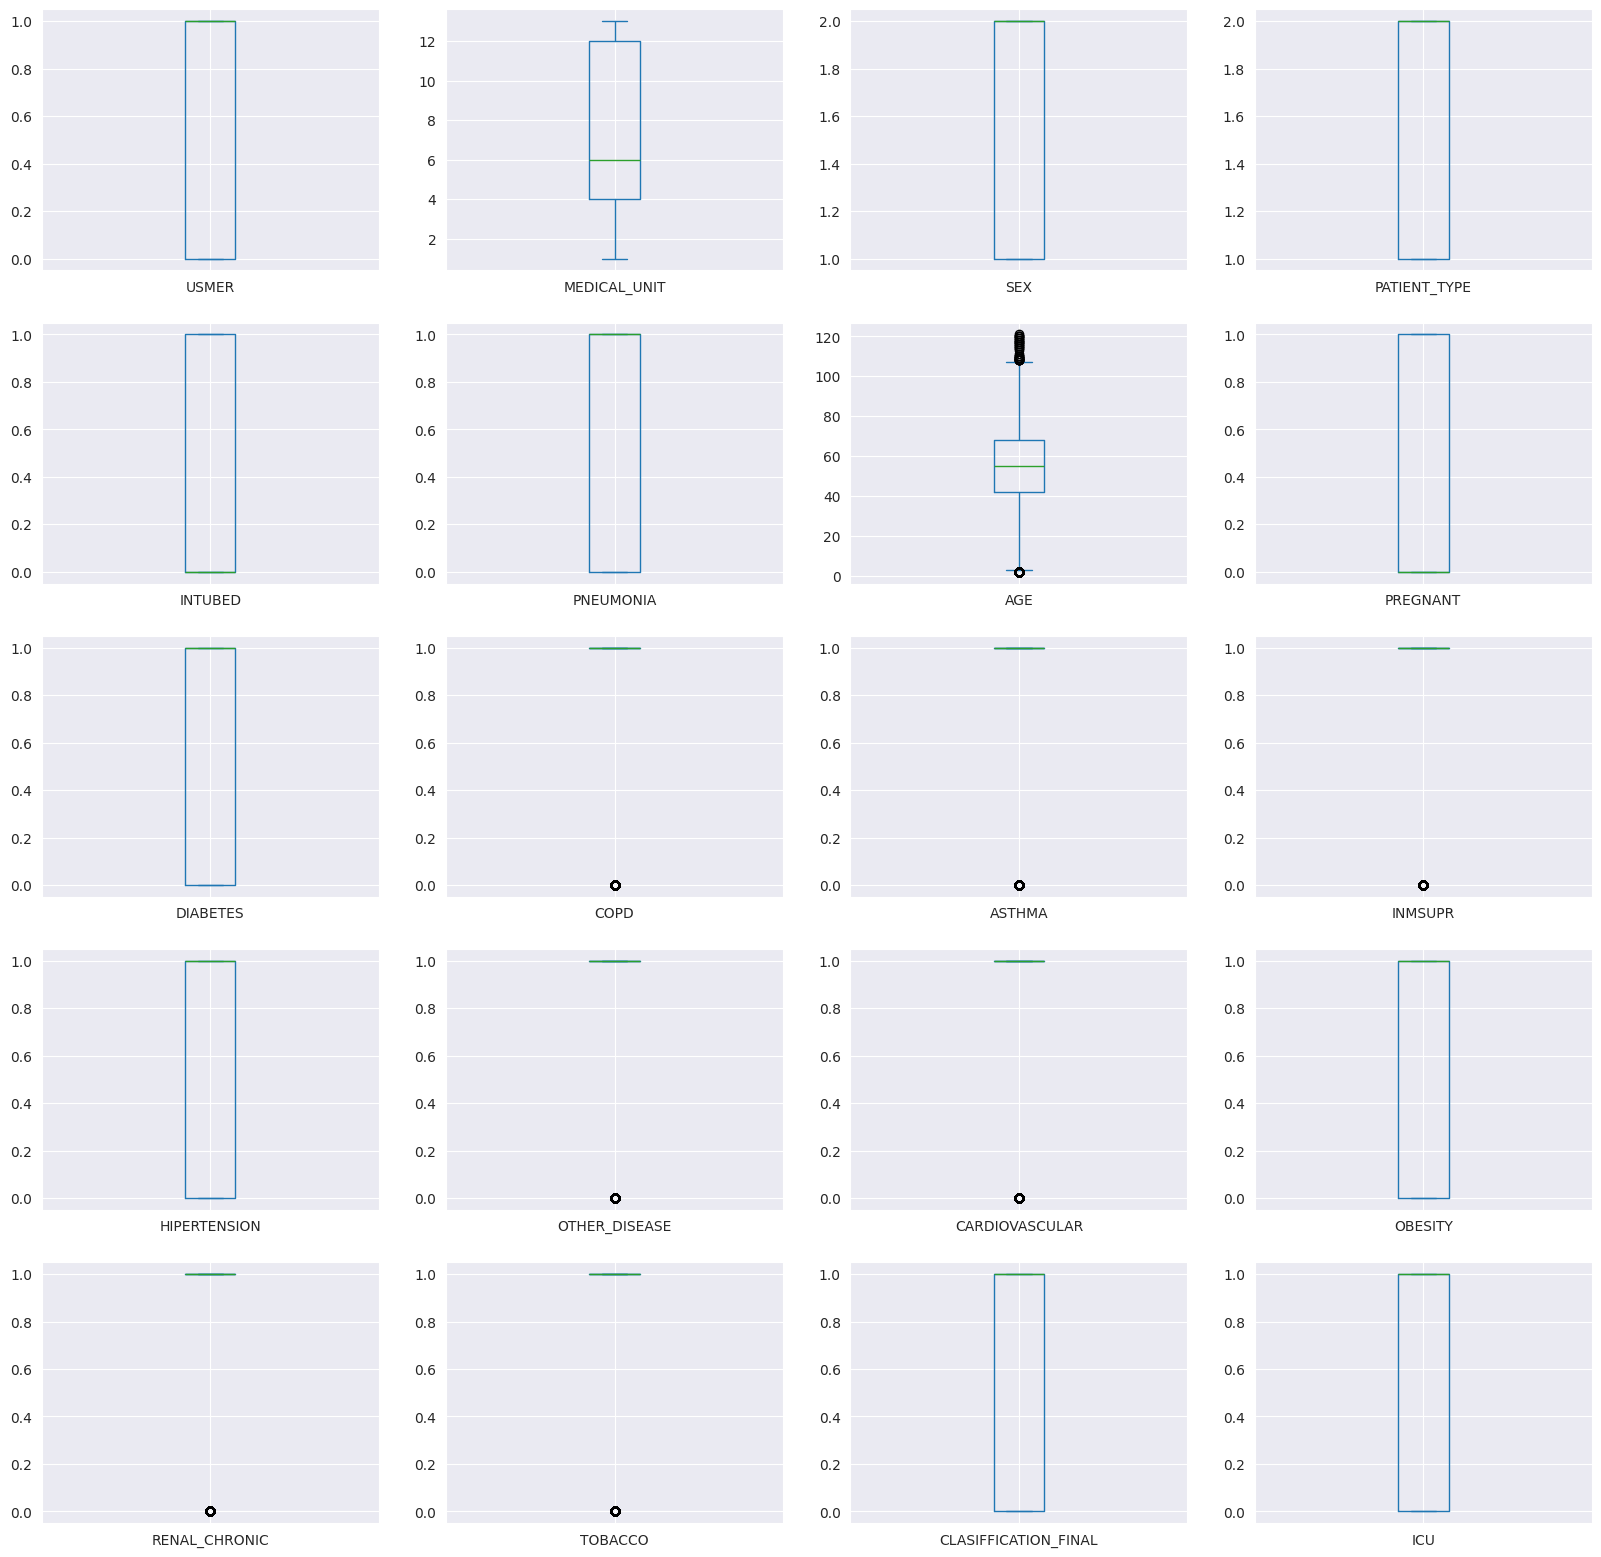

In [43]:
axes = COVID[columns].plot (
    kind='box',
    subplots=True,
    layout=(10,4),
    figsize=(20,40)
)
plt.show()

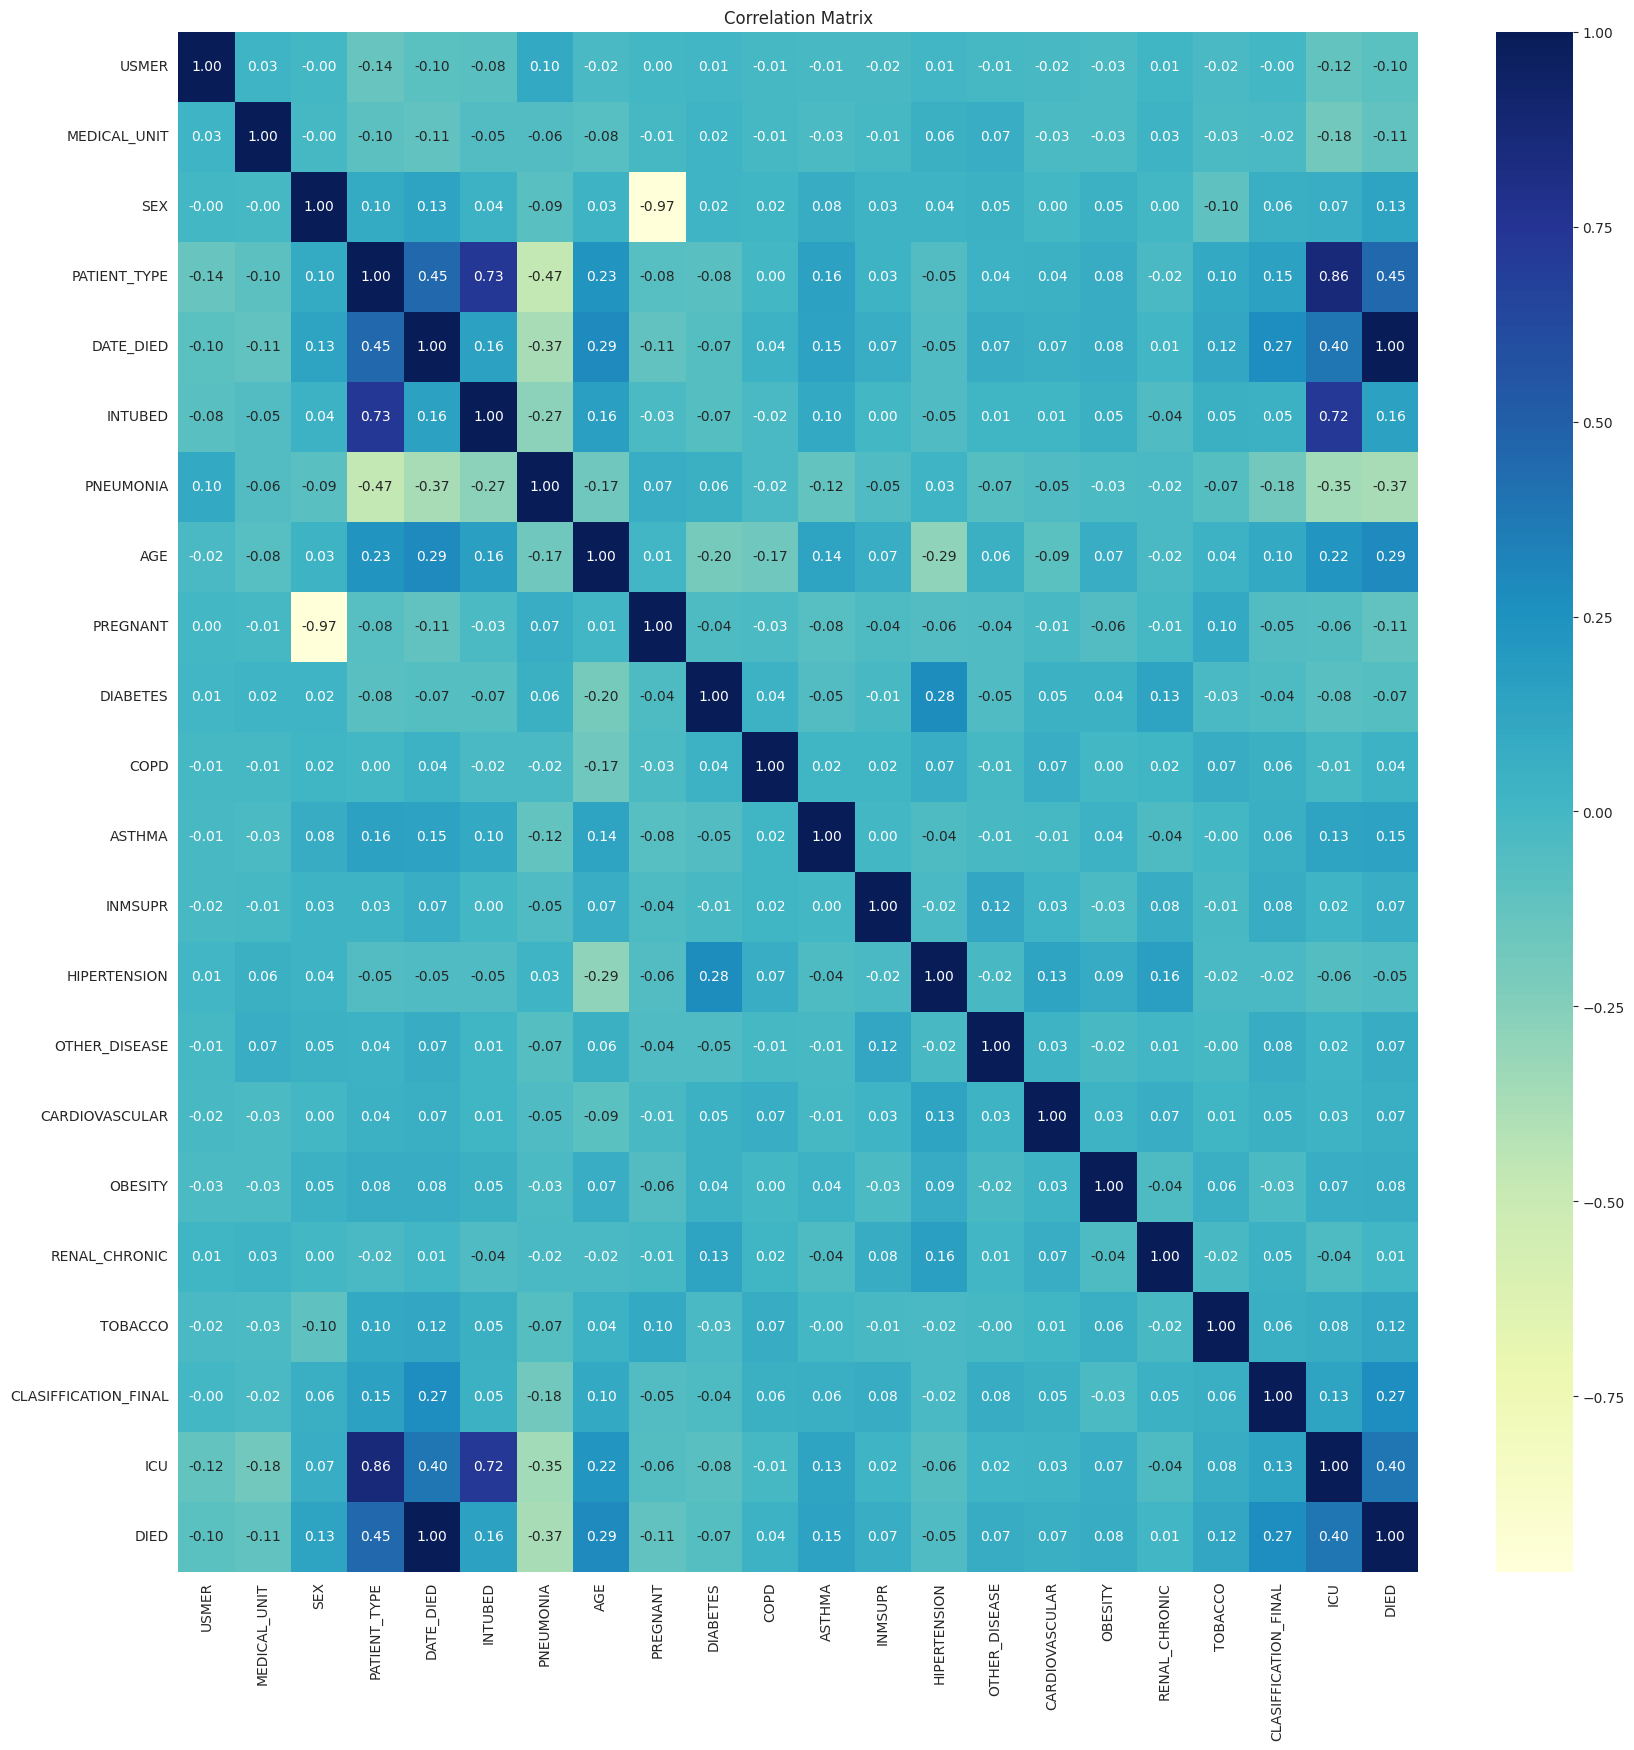

In [44]:
#Correlation matrix
corr_mat = COVID.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

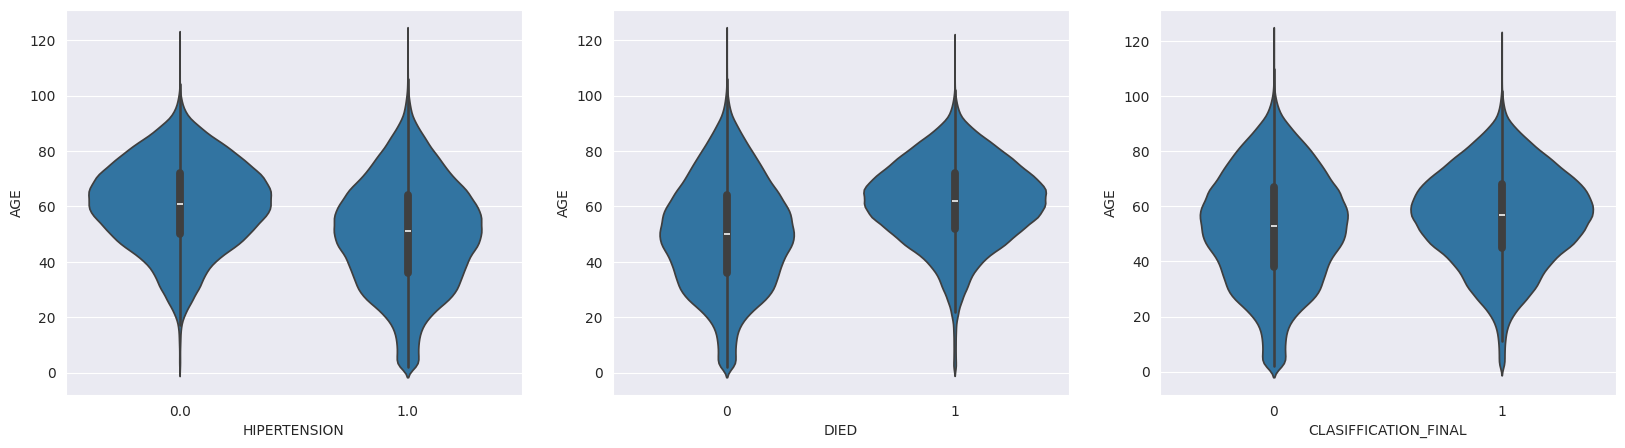

In [45]:
#Violin plots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.violinplot(x='HIPERTENSION', y= 'AGE', data=COVID, ax=axes[0])

sns.violinplot(x='DIED', y='AGE', data=COVID, ax=axes[1])

sns.violinplot(x='CLASIFFICATION_FINAL', y='AGE', data=COVID, ax=axes[2])

plt.show()

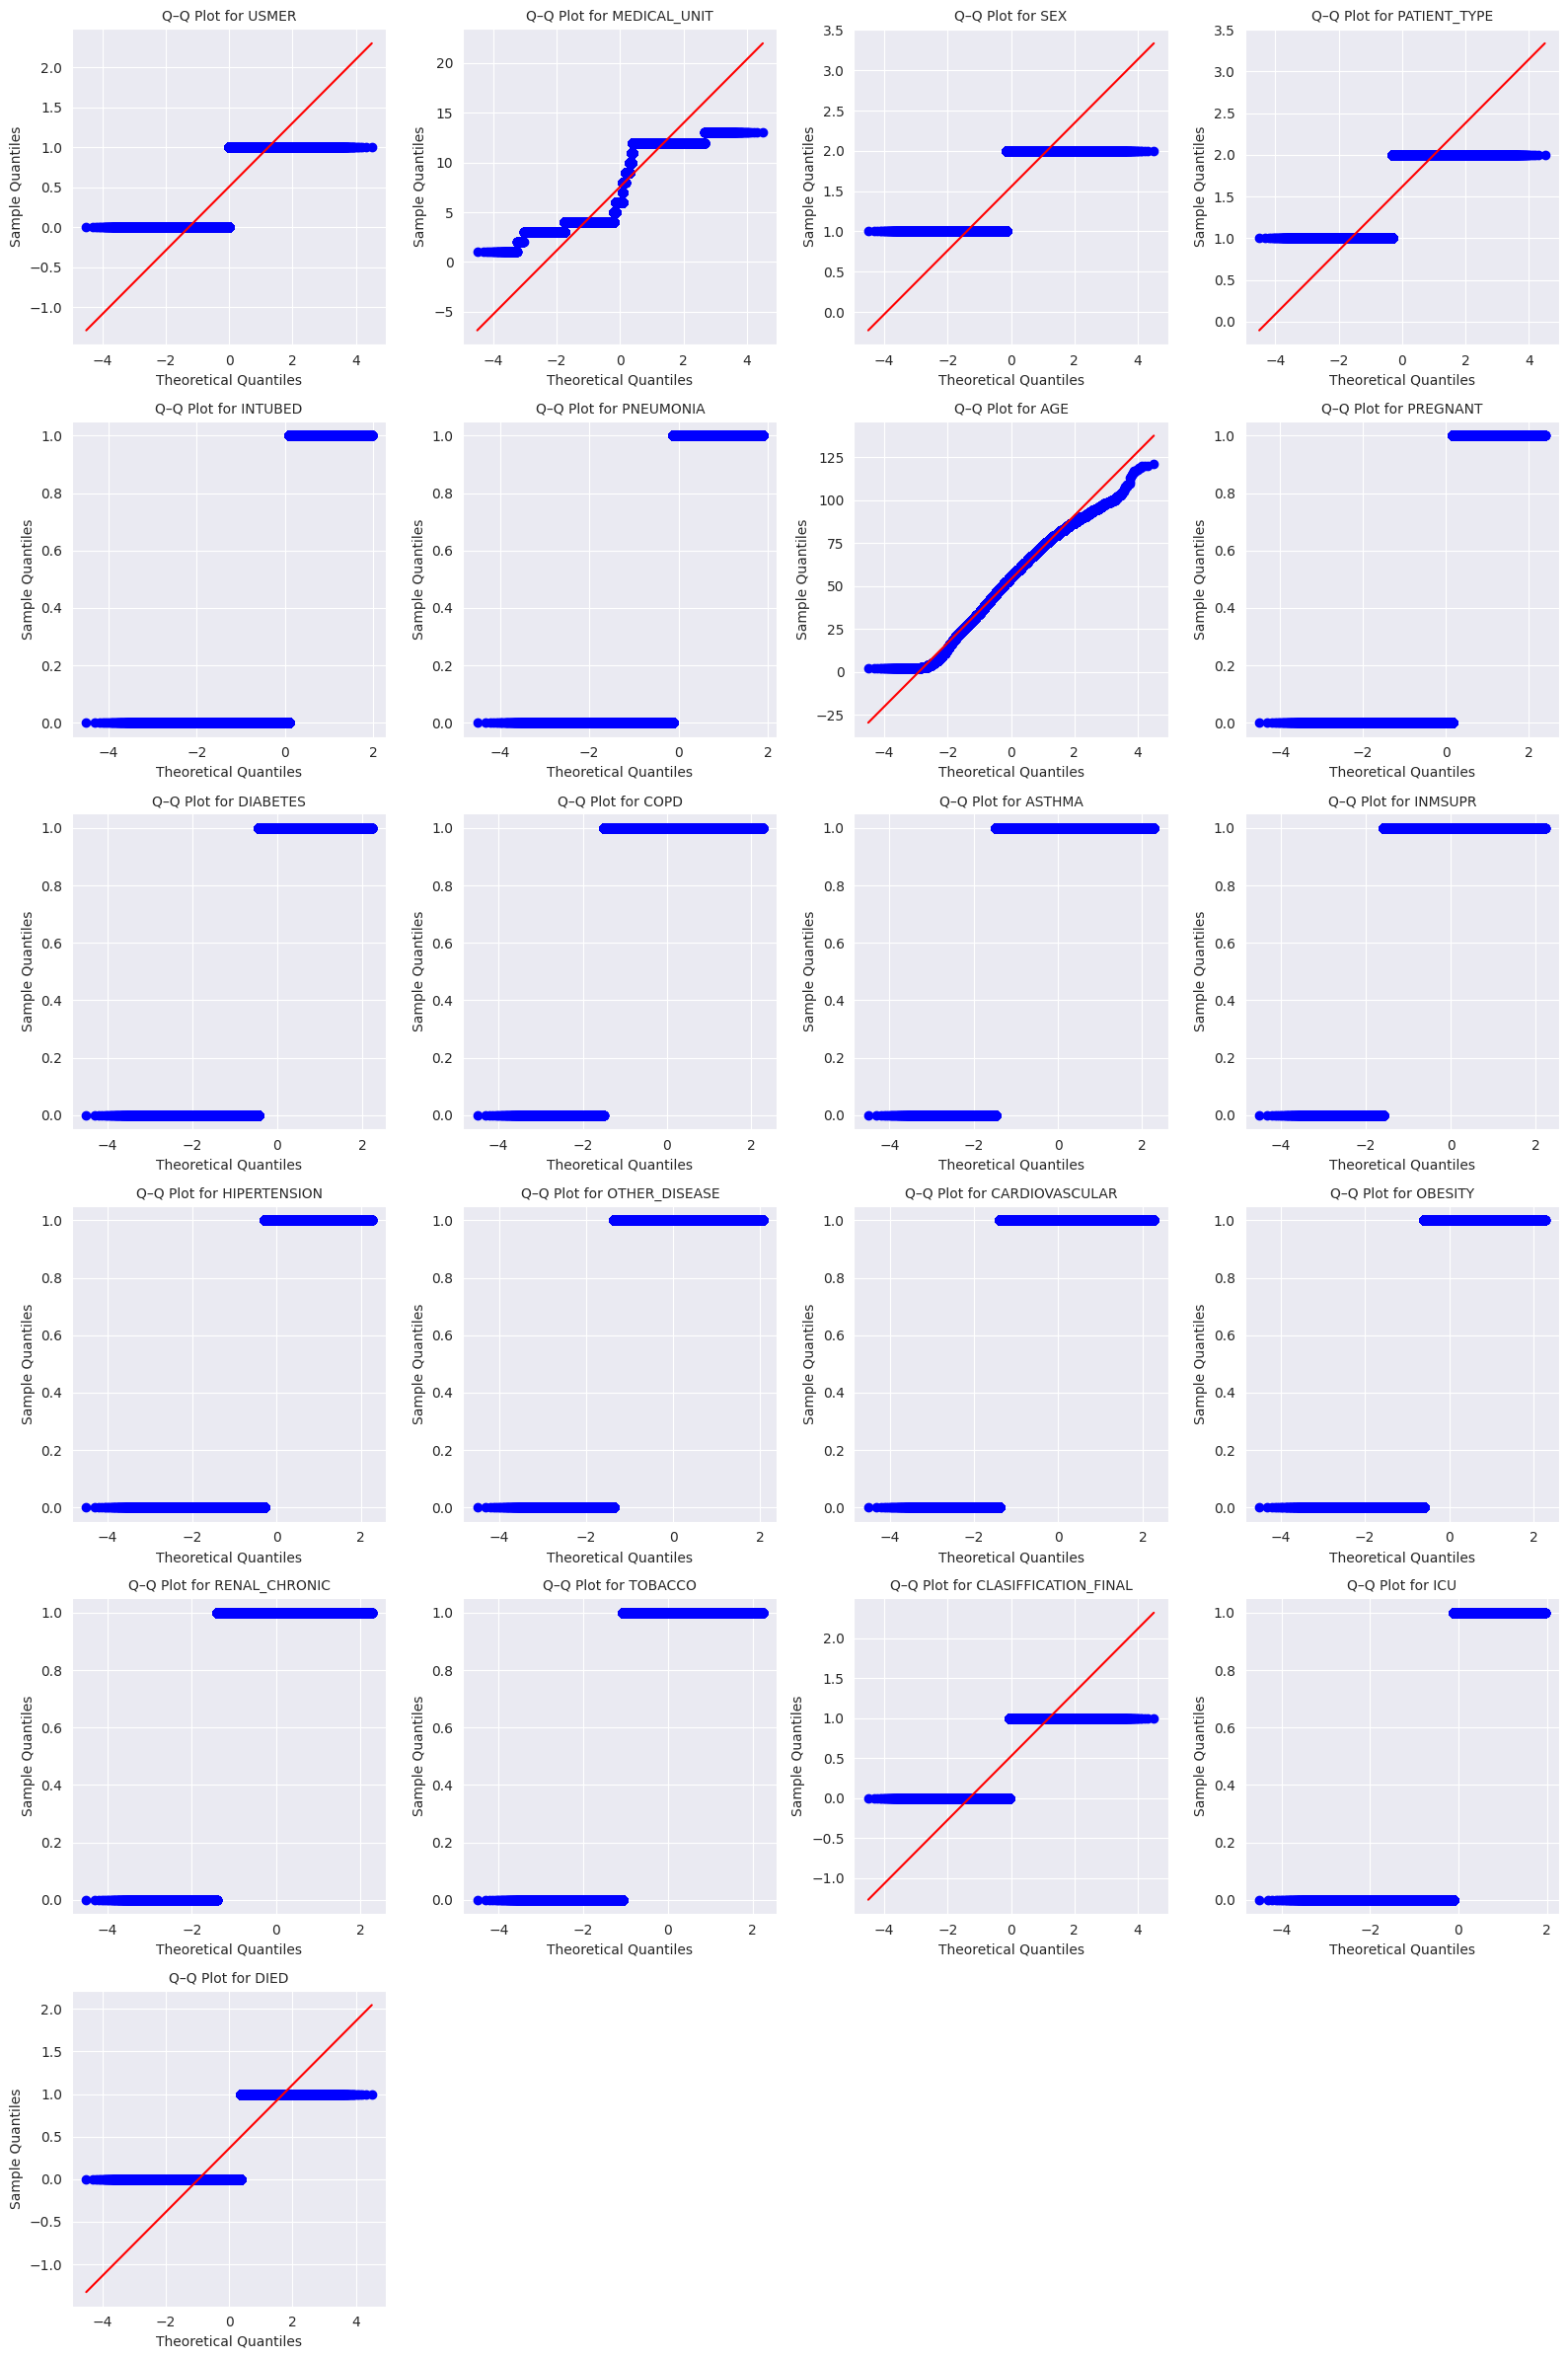

In [46]:
# Q-Q plots
num_col = COVID.select_dtypes(include=['number']).columns
n_cols = 4  # number of plots per row
n_rows = int(np.ceil(len(num_col) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(num_col):
    stats.probplot(COVID[col], dist="norm", plot=axes[i])
    axes[i].set_title(f"Q–Q Plot for {col}", fontsize=10)
    axes[i].set_xlabel("Theoretical Quantiles")
    axes[i].set_ylabel("Sample Quantiles")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [47]:
# We don't need DATE_DIED -> FLAG DIED
COVID.drop(columns='DATE_DIED', inplace=True)
COVID.dropna(axis=0,inplace=True)

# Export cleaned dataset
COVID.to_csv("../Datasets/Covid_Cleaned.csv", index=False)